# UNIX Commands for Data Scientists

## Declare Filename

In [7]:
!filename='./unix/shakespeare.txt'

## head

In [8]:
!head -n 3 $filename

## tail

In [9]:
!tail -n 10 $filename

## word count

In [10]:
!wc $filename

 124505  901447 5583442 ./unix/shakespeare.txt


In [11]:
!wc -l $filename

124505 ./unix/shakespeare.txt


## cat

In [39]:
!cat $filename | wc -l 

124505


## grep

In [19]:
!grep -i 'parchment' $filename

  If the skin were parchment, and the blows you gave were ink,
  Ham. Is not parchment made of sheepskins?
    of the skin of an innocent lamb should be made parchment? That
    parchment, being scribbl'd o'er, should undo a man? Some say the
    Upon a parchment, and against this fire
    But here's a parchment with the seal of Caesar;  
    With inky blots and rotten parchment bonds;
    Nor brass, nor stone, nor parchment, bears not one,


In [59]:
#output matching pattern one per line and then count number of lines

!cat $filename | grep -o 'liberty' | wc -l

71


## sed

In [20]:
#replace all instances of 'parchment' to 'manuscript'

!sed -e 's/parchment/manuscript/g' $filename > temp.txt

In [25]:
!grep -i 'manuscript' temp.txt 

  If the skin were manuscript, and the blows you gave were ink,
  Ham. Is not manuscript made of sheepskins?
    of the skin of an innocent lamb should be made manuscript? That
    manuscript, being scribbl'd o'er, should undo a man? Some say the
    Upon a manuscript, and against this fire
    But here's a manuscript with the seal of Caesar;  
    With inky blots and rotten manuscript bonds;
    Nor brass, nor stone, nor manuscript, bears not one,


## sort

In [27]:
#SORT
!head -n 5 $filename

In [28]:
!head -n 5 $filename | sort

In [30]:
# columns separated by ' ', sort on column 2 (-k2), case insensitive (-f)
!head -n 5 $filename | sort -f -t' ' -k2

In [37]:
!sort $filename | wc -l

124505


In [38]:
# uniq command for getting unique records using -u option

!sort $filename | uniq -u | wc -l

110834


# Lets bring it all together

## Count most frequent words in the text un UNIX

In [71]:
!sed -e 's/\s/\n/g' < $filename | sort | uniq -c | sort -nr | head -15

 641573 
  23244 the
  19542 I
  18302 and
  15623 to
  15551 of
  12532 a
  10824 my
   9576 in
   9081 you
   7851 is
   7531 that
   7068 And
   6948 not
   6722 with
sort: write failed: standard output: Broken pipe
sort: write error


In [68]:
# head stops after 15 lines, hence 'sort' command is sending the last two lines

## Write the output to a file

In [75]:
!sed -e 's/\s/\n/g' < $filename | sort | uniq -c | sort -nr | head -15 > count_vs_words

sort: write failed: standard output: Broken pipe
sort: write error


In [77]:
!cat count_vs_words

 641573 
  23244 the
  19542 I
  18302 and
  15623 to
  15551 of
  12532 a
  10824 my
   9576 in
   9081 you
   7851 is
   7531 that
   7068 And
   6948 not
   6722 with


## Plot by importing wordcounts into Python

In [80]:
%matplotlib inline

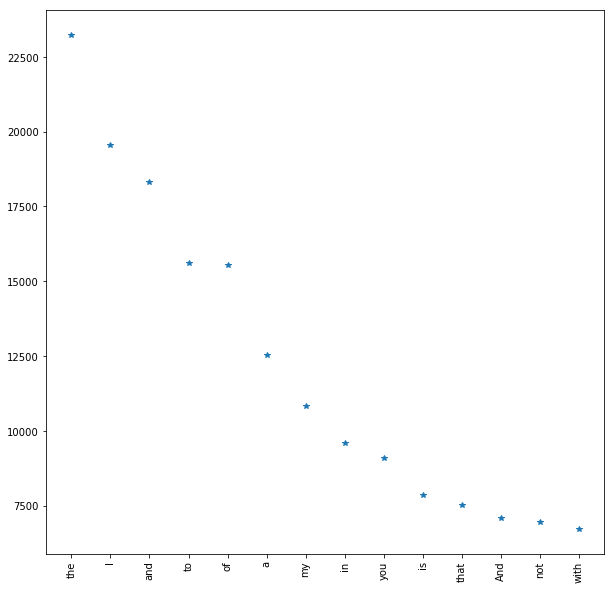

In [115]:
import matplotlib.pyplot as plt
import csv

xTicks = []
y = []

with open('count_vs_words','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        y.append(int(row[-2]))
        xTicks.append(str(row[-1]))

#remove the count of spaces (first line)
y = y[1:]
xTicks = xTicks[1:]
#plot
x = range(len(y))
plt.figure(figsize=(10,10))
plt.xticks(x, xTicks, rotation=90) #xlabel  with 90 degree angle
plt.plot(x,y,'*')
plt.show()